<a href="https://colab.research.google.com/github/someDeveloperDH/game/blob/Vlolet/RSP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from random import shuffle
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
#데이터 경로
base_dir = "/content/drive/MyDrive/DeepAi/RPS" #필요시 경로 수정 필수
base_dir = "/content/drive/MyDrive/Colab Notebooks/myRPS/RPS_rawdata"

train_dir = os.path.join(base_dir,"train")
test_dir = os.path.join(base_dir,"test")



train_paper_dir = os.path.join(train_dir,"paper") #650개
train_rock_dir = os.path.join(train_dir,"rock")
train_scissors_dir = os.path.join(train_dir,"scissors")



test_paper_dir = os.path.join(test_dir,"paper") #90개
test_rock_dir = os.path.join(test_dir,"rock")
test_scissors_dir = os.path.join(test_dir,"scissors")


In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)
test_datagen = ImageDataGenerator(rescale = 1./255)

print(train_datagen)

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    subset='training',  #subset 설정안하면 분리 안됨
                                                    batch_size=16,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    target_size=(224,224))
validation_generator = train_datagen.flow_from_directory(train_dir,
                                                         subset='validation',
                                                              batch_size=4,
                                                              color_mode='rgb',
                                                              class_mode='categorical',
                                                              target_size=(224,224))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=4,
                                                  color_mode='rgb',
                                                  class_mode='categorical',
                                                  target_size=(224,224))
print(f"훈련 이미지 개수: {train_generator.samples}")
print(f"검증 이미지 개수: {validation_generator.samples}")
print(f"테스트 이미지 개수: {test_generator.samples}")

Found 581 images belonging to 3 classes.
Found 249 images belonging to 3 classes.
Found 270 images belonging to 3 classes.
훈련 이미지 개수: 581
검증 이미지 개수: 249
테스트 이미지 개수: 270


In [9]:
#폴더기준으로 자동으로 클래스 나눈거 확인
train_generator.class_indices


{'paper': 0, 'rock': 1, 'scissors': 2}

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [11]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics= ['accuracy'])


In [12]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=10,
                              epochs=100,
                              validation_steps=10,
                              verbose=2)


<ipython-input-12-1e5eb6015191>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/100
10/10 - 27s - loss: 1.1993 - accuracy: 0.4688 - val_loss: 0.8706 - val_accuracy: 0.7000 - 27s/epoch - 3s/step
Epoch 2/100
10/10 - 15s - loss: 0.6781 - accuracy: 0.7450 - val_loss: 0.5394 - val_accuracy: 0.7750 - 15s/epoch - 1s/step
Epoch 3/100
10/10 - 10s - loss: 0.7151 - accuracy: 0.5570 - val_loss: 0.6042 - val_accuracy: 0.8000 - 10s/epoch - 1s/step
Epoch 4/100
10/10 - 6s - loss: 0.5831 - accuracy: 0.7500 - val_loss: 0.4665 - val_accuracy: 0.8250 - 6s/epoch - 555ms/step
Epoch 5/100
10/10 - 5s - loss: 0.5581 - accuracy: 0.7625 - val_loss: 0.4933 - val_accuracy: 0.8000 - 5s/epoch - 493ms/step
Epoch 6/100
10/10 - 4s - loss: 0.5240 - accuracy: 0.8000 - val_loss: 0.5848 - val_accuracy: 0.7250 - 4s/epoch - 358ms/step
Epoch 7/100
10/10 - 6s - loss: 0.5576 - accuracy: 0.8000 - val_loss: 0.5148 - val_accuracy: 0.8000 - 6s/epoch - 594ms/step
Epoch 8/100
10/10 - 2s - loss: 0.4964 - accuracy: 0.7987 - val_loss: 0.3682 - val_accuracy: 0.8750 - 2s/epoch - 165ms/step
Epoch 9/100
10/10 -

In [13]:
model.evaluate(train_generator)

37/37 [==============================] - 4s 103ms/step - loss: 0.2190 - accuracy: 0.9277


[0.21903759241104126, 0.9277108311653137]

In [14]:
model.evaluate(validation_generator)

63/63 [==============================] - 2s 30ms/step - loss: 1.9728 - accuracy: 0.8153


[1.9727610349655151, 0.8152610659599304]

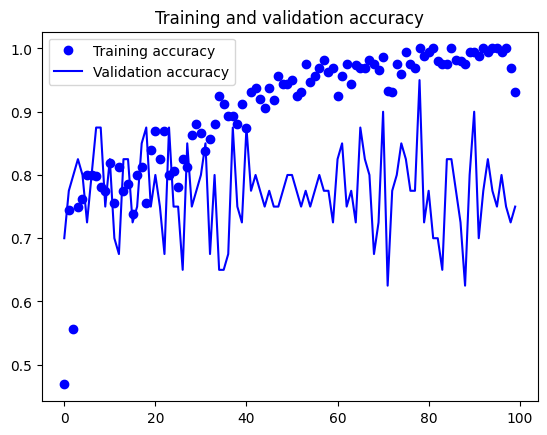

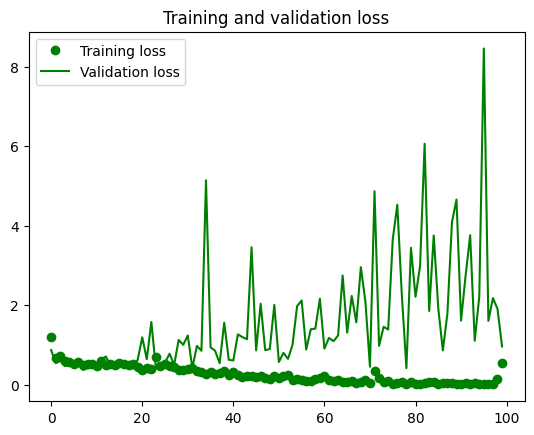

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

20/20 [==============================] - 30s 2s/step - loss: 5.1702 - accuracy: 0.4625
Test accuracy: 0.4625000059604645
Test loss: 5.170156955718994


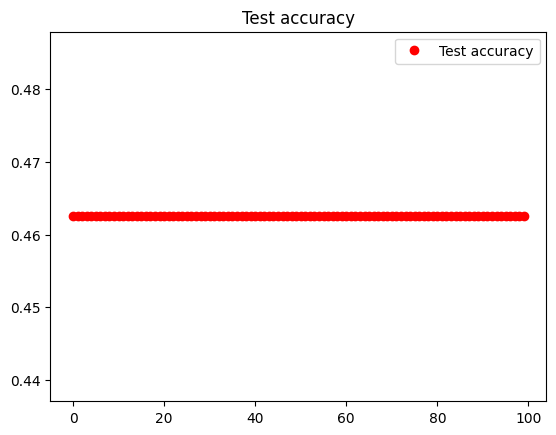

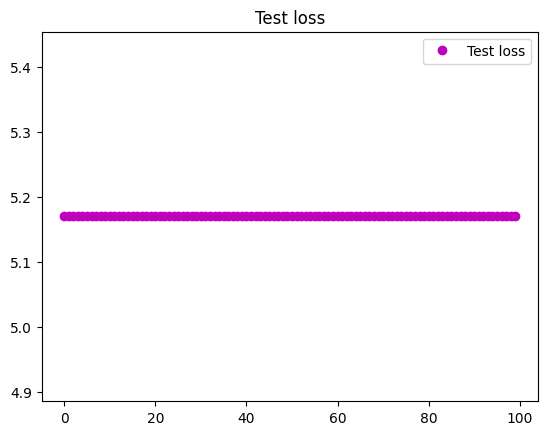

In [16]:
test_loss, test_acc = model.evaluate(test_generator, steps=20)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

plt.figure()

plt.plot(epochs, [test_acc]*len(epochs), 'ro', label='Test accuracy')
plt.title('Test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, [test_loss]*len(epochs), 'mo', label='Test loss')
plt.title('Test loss')
plt.legend()

plt.show()